In [32]:
import cv2
import matplotlib.pyplot as plt

In [33]:
img=cv2.imread("./testimg.JPG")

In [34]:
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

mask_green = cv2.inRange(hsv, (36,0,0), (86,255,255))
mask_brown = cv2.inRange(hsv, (8, 60, 20), (30, 255, 200))
mask_yellow = cv2.inRange(hsv, (14, 39, 64), (40, 255, 255))
mask = cv2.bitwise_or(mask_green, mask_brown)
mask = cv2.bitwise_or(mask, mask_yellow)
res = cv2.bitwise_and(img,img, mask= mask)

# cv2.imshow("original", img)
# cv2.imshow("final image", res)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

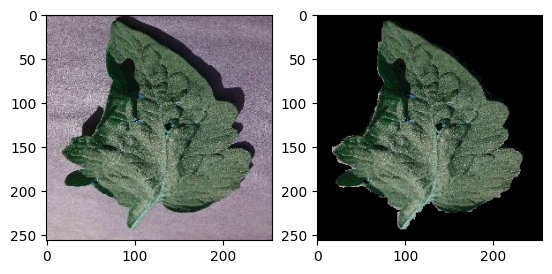

In [35]:
plt.subplot(1,2,1)
plt.imshow(img,cmap='gray')
plt.subplot(1,2,2)
plt.imshow(res,cmap='gray')

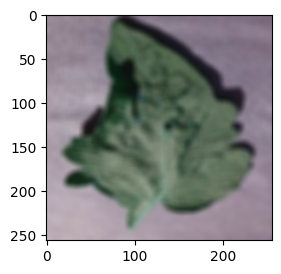

In [36]:
dst = cv2.GaussianBlur(img,(9,9),cv2.BORDER_DEFAULT)
plt.subplot(1,2,1)
plt.imshow(dst,cmap='gray')

In [37]:
fn=img.copy()
fn.shape

(256, 256, 3)

In [38]:
for i in range(3):
    for j in range(img.shape[0]):
        for k in range(img.shape[1]):
            if res[j,k,i]==0:
                fn[j,k,i]=dst[j,k,i]
            else:
                fn[j,k,i]=res[j,k,i]
                

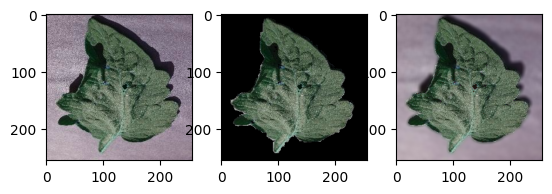

In [39]:
plt.subplot(1,3,1)
plt.imshow(img,cmap='gray')
plt.subplot(1,3,2)
plt.imshow(res,cmap='gray')
plt.subplot(1,3,3)
plt.imshow(fn,cmap='gray')

In [48]:
def bgblur(img):
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

    mask_green = cv2.inRange(hsv, (36,0,0), (86,255,255))
    mask_brown = cv2.inRange(hsv, (8, 60, 20), (30, 255, 200))
    mask_yellow = cv2.inRange(hsv, (14, 39, 64), (40, 255, 255))
    mask = cv2.bitwise_or(mask_green, mask_brown)
    mask = cv2.bitwise_or(mask, mask_yellow)
    res = cv2.bitwise_and(img,img, mask= mask)
    dst = cv2.GaussianBlur(img,(9,9),cv2.BORDER_DEFAULT)
    fn=img.copy()
    for i in range(3):
        for j in range(img.shape[0]):
            for k in range(img.shape[1]):
                if res[j,k,i]==0:
                    fn[j,k,i]=dst[j,k,i]
                else:
                    fn[j,k,i]=res[j,k,i]
    return fn
    

In [61]:
import os
ogpath="../Tomato/valid/"
listset=os.listdir(ogpath)

In [62]:
listset

['Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___healthy',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Target_Spot',
 'Tomato___Tomato_mosaic_virus',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus']

In [63]:
for i in range(len(listset)):
    imglist=os.listdir(ogpath+listset[i])
    pathnew='./bgblur_valid/'+listset[i]+'/'
    os.mkdir(pathnew)
    for im in imglist:
        img=cv2.imread(ogpath+listset[i]+'/'+im)
        blurim=bgblur(img)
        cv2.imwrite(os.path.join(pathnew,im),blurim)

In [59]:
# os.mkdir(pathnew)
# img=cv2.imread(ogpath+listset[0]+'/'+im)
# blurim=bgblur(img)
# cv2.imwrite(os.path.join(pathnew,im),blurim)